In [6]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
sym.init_printing(use_latex=True)

# Models of a neuron
## 1.1 

First we proof that $ \frac{df}{dv} = af(v)[1-f(v)] $ 

is a derivative of 

$f(v)= \frac{1}{1+exp(-av)} $

by solving $ \frac{df}{dv} = af(v)[1-f(v)] $ as a differential equation.
  

using sympy:

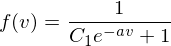

In [35]:
v = sym.symbols('v') 
a = sym.symbols('a') 
f = sym.Function('f')(v)
f_prime = sym.Derivative(f, v)

eq = f_prime - a*f*(1-f)
eqnsoln = sym.dsolve(eq)

display(eqnsoln)

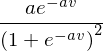

In [47]:
v = sym.symbols('v') 
a = sym.symbols('a') 
f = 1/(1+sym.exp(-a*v)) #defines f as a symbolic function
df=sym.diff(f, v)
#display(df.subs(v,0))
df

## 1.3 
$g(v)= \frac{v}{\sqrt{1+v^2}} $  \\

---


$df/dv = f^3(v)/v^3 $  

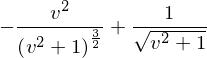

In [52]:
v = sym.symbols('v') 
a = sym.symbols('a') 
f = v/sym.sqrt(1+v**2) #defines f as a symbolic function
df=sym.diff(f, v)
df
#df.subs(v,0)

## Network architectures



In [10]:
nn_architecture = [
    {"layer_size": 10, "activation": "none"}, # input layer
    {"layer_size": 4, "activation": "relu"},
    {"layer_size": 3, "activation": "relu"},
    {"layer_size": 1, "activation": "sigmoid"} #output 
]

def initialize_parameters(nn_architecture, seed = 2):
    np.random.seed(seed) # pseudorandom number generator.
    # python dictionary containing our parameters "W1", "b1", ..., "WL", "bL"
    parameters = {}
    number_of_layers = len(nn_architecture)

    for l in range(1, number_of_layers):
        parameters['W' + str(l)] = np.random.randn(
            nn_architecture[l]["layer_size"],
            nn_architecture[l-1]["layer_size"]
            ) * 0.01
        parameters['b' + str(l)] = np.zeros((nn_architecture[l]["layer_size"], 1))
        
    return parameters
def sigmoid(Z):
    S = 1 / (1 + np.exp(-Z))
    return S
def relu(Z):
    R = np.maximum(0, Z)
    return R
